#Q1. What are the advantages of a CNN over a fully connected DNN for image classification?

ANS:Convolutional Neural Networks (CNNs) have several advantages over fully connected Deep Neural Networks (DNNs) when it comes to image classification:

1. Hierarchical Feature Learning: CNNs are specifically designed to capture hierarchical features in images. Convolutional layers with shared weights learn local patterns, such as edges or textures, across the entire image, while pooling layers capture spatial invariance and reduce dimensionality. This hierarchical feature learning enables CNNs to extract meaningful and discriminative features at different levels of abstraction.

2. Translation Invariance: CNNs exploit the translation invariance property of images. By using shared weights and local receptive fields, CNNs can recognize the same pattern regardless of its location in the image. This property makes CNNs more robust to variations in object position, making them well-suited for tasks like image classification.

3. Parameter Efficiency: CNNs are more parameter-efficient compared to fully connected DNNs. In CNNs, weight sharing is used to exploit spatial coherence, reducing the number of learnable parameters. This parameter sharing allows CNNs to effectively learn from high-dimensional images without requiring an excessive number of parameters, making them more efficient and less prone to overfitting.

4. Spatial Structure Preservation: CNNs preserve the spatial structure of the input image through convolutional and pooling layers. Fully connected DNNs treat input data as a one-dimensional vector and ignore the spatial relationships present in images. CNNs, on the other hand, retain the spatial information within the image, which is essential for capturing visual patterns and object relationships.

5. Computational Efficiency: Due to weight sharing and local receptive fields, CNNs are computationally efficient compared to fully connected DNNs. The convolutional and pooling operations in CNNs reduce the spatial dimensions, resulting in a smaller number of parameters and computations compared to fully connected layers, especially for large input images.

6. Scale and Rotation Invariance: CNNs can exhibit scale and rotation invariance to some extent. Due to the pooling layers, CNNs can handle variations in object size and orientation. This property allows CNNs to classify objects regardless of their specific scales or rotations within the image.


#Q2. Consider a CNN composed of three convolutional layers, each with 3 × 3 kernels, a stride of 2, and &quot;same&quot; padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200 × 300 pixels.

What is the total number of parameters in the CNN? If we are using 32-bit floats, at least how much
RAM will this network require when making a prediction for a single instance? What about when
training on a mini-batch of 50 images?

ANS:To calculate the total number of parameters in the CNN, we need to consider the parameters in each layer and their corresponding dimensions. Here's how we can calculate the total number of parameters:

1. Convolutional Layer 1:
   - Input: RGB images (3 channels) of size 200 × 300
   - Number of filters: 100
   - Filter size: 3 × 3
   - Bias terms: 100
   - Total parameters in Convolutional Layer 1: (3 channels × 3 × 3 + 1) × 100 = 2800

2. Convolutional Layer 2:
   - Input: 100 feature maps from the previous layer
   - Number of filters: 200
   - Filter size: 3 × 3
   - Bias terms: 200
   - Total parameters in Convolutional Layer 2: (100 feature maps × 3 × 3 + 1) × 200 = 180,200

3. Convolutional Layer 3:
   - Input: 200 feature maps from the previous layer
   - Number of filters: 400
   - Filter size: 3 × 3
   - Bias terms: 400
   - Total parameters in Convolutional Layer 3: (200 feature maps × 3 × 3 + 1) × 400 = 720,400

Total number of parameters in the CNN: 2800 + 180,200 + 720,400 = 903,400 parameters

Now, let's calculate the memory required for making predictions and training:

For making a prediction for a single instance:
- Each parameter is stored as a 32-bit float (4 bytes).
- The total memory required for making a prediction can be calculated by multiplying the number of parameters by the size of each parameter.

Memory required for making a prediction for a single instance: 903,400 parameters × 4 bytes/parameter = 3,613,600 bytes or approximately 3.45 MB

For training on a mini-batch of 50 images:
- The memory required for training will include the memory for storing input images, intermediate feature maps, gradients, and other variables used in backpropagation.
- The exact memory requirements may depend on various factors, such as the batch size, GPU memory limitations, and memory optimization techniques.
- However, a rough estimation of the memory required for training can be calculated by considering the memory for storing the parameters and a multiple of the batch size.

Memory required for training on a mini-batch of 50 images: (903,400 parameters × 4 bytes/parameter) + (50 images × size of image data)

Please note that the size of image data depends on the size of each image (200 × 300) and the number of channels (3 for RGB images), resulting in a total size of 200 × 300 × 3 × 4 bytes (assuming each pixel is represented as a 32-bit float).



# Q3. If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?

ANS:If your GPU runs out of memory while training a CNN, here are five things you could try to solve the problem:

1. Reduce Batch Size: One of the most common solutions is to reduce the batch size. The batch size determines how many samples are processed in each iteration. By reducing the batch size, you can reduce the memory usage because fewer samples are stored in GPU memory at a time. However, smaller batch sizes may affect the convergence speed and stability of the training process.

2. Decrease Model Complexity: Another approach is to reduce the complexity of the model. This can involve reducing the number of layers, decreasing the number of filters in each layer, or decreasing the dimensions of the feature maps. A simpler model requires less memory to store the parameters and intermediate activations.

3. Use Data Parallelism: Data parallelism involves splitting the mini-batch across multiple GPUs or CPU cores. Each GPU or core processes a subset of the mini-batch independently, and the gradients are averaged or aggregated before updating the model's parameters. Data parallelism allows you to train with a larger effective batch size without increasing memory usage on a single GPU.

4. Gradient Checkpointing: Gradient checkpointing is a technique that trades off memory usage for computation time. Instead of storing all intermediate activations during the forward pass, you selectively store a subset of activations that are necessary for computing the gradients during backpropagation. This reduces memory consumption at the cost of increased computation time.

5. Use Mixed Precision Training: Mixed precision training combines both single-precision (FP32) and half-precision (FP16) floating-point formats. FP16 requires half the memory of FP32 but can lead to numerical stability issues. By using mixed precision training, you can store certain parts of the model in FP16 while keeping other parts in FP32, reducing memory usage while maintaining numerical stability.

It's worth noting that the effectiveness of these solutions may depend on the specific architecture, model size, and memory requirements of your CNN. Additionally, it is recommended to monitor GPU memory usage during training and consider using tools like NVIDIA's CUDA memory profiler or TensorFlow's memory profiler to gain insights into memory usage and potential optimizations.

# Q 4. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?

ABS:Adding a max pooling layer instead of a convolutional layer with the same stride serves different purposes in a Convolutional Neural Network (CNN). Both layers are used for different types of operations during the feature extraction process.

**Max Pooling Layer**:
A max pooling layer is primarily used to downsample the spatial dimensions of the feature maps, reducing their size while retaining the most important information. It operates by dividing the feature map into non-overlapping regions (often with a fixed size, like 2x2 or 3x3) and selecting the maximum value within each region as the output. Max pooling helps in achieving several benefits:

1. **Translation Invariance**: Max pooling provides a degree of translation invariance, which means that small changes in the input's location will not have a significant impact on the output. This property helps the network to focus on the most important features, regardless of their exact position in the input.

2. **Dimensionality Reduction**: By reducing the spatial dimensions of the feature maps, max pooling helps in controlling the model's memory usage and computational complexity, making the network more manageable and efficient.

**Convolutional Layer with the Same Stride**:
A convolutional layer with the same stride as a max pooling layer would still be used for feature extraction, but it wouldn't serve the downsampling purpose. The role of the convolutional layer with the same stride is to capture local patterns and features in the input data.

When might you choose a convolutional layer with the same stride over a max pooling layer?

1. **Early Layers**: In the early layers of a CNN, you might want to use convolutional layers with a small stride to extract local features at a higher resolution without significant downsampling. This is especially useful when the input data contains fine-grained details that need to be preserved in the early stages of processing.

2. **Fully Convolutional Networks**: In certain architectures, like Fully Convolutional Networks (FCNs) used for semantic segmentation tasks, strided convolutions are employed to perform both downsampling and feature extraction simultaneously, without relying on pooling layers.

In summary, the choice between a max pooling layer and a convolutional layer with the same stride depends on the specific requirements of the CNN architecture and the objectives of the feature extraction process at different stages of the network. Max pooling is commonly used for downsampling and translation invariance, while strided convolutions are used when preserving finer details is essential or when dealing with fully convolutional architectures.

# Q5. When would you want to add a local response normalization layer?

ANS:The Local Response Normalization (LRN) layer was introduced as a technique in deep learning, particularly in Convolutional Neural Networks (CNNs), to enhance the generalization and discriminative capabilities of the network. However, it is important to note that LRN is less commonly used in modern architectures compared to other normalization techniques like Batch Normalization. As of my knowledge cutoff in September 2021, it might have been largely replaced by more effective normalization methods in most cases.

Nonetheless, there might be some situations where you would consider adding a Local Response Normalization layer:

1. **Traditional CNN Architectures**: LRN was popular in traditional CNN architectures, especially before Batch Normalization became widespread. If you are working with an older network architecture and LRN is already a part of it, you might choose to keep it for compatibility reasons.

2. **Replicating Older Research**: If you are reproducing an older research study or paper that used LRN and want to compare your results directly with theirs, you would need to include LRN in your model.

3. **Specific Architectural Choices**: In some specialized architectures, particularly those inspired by biological visual systems, LRN might be preferred due to its local inhibition and excitation properties.

Despite the above scenarios, it is important to be aware that LRN has some limitations, and more modern normalization techniques, like Batch Normalization or Layer Normalization, are generally more effective and easier to implement. These normalization techniques tend to provide better regularization, accelerate training convergence, and handle covariate shift more robustly compared to LRN. Therefore, when building new CNN models or updating existing ones, you may prefer using Batch Normalization or other normalization techniques instead of LRN.

#Q6. Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main innovations in GoogLeNet, ResNet, SENet, and Xception?

ANS:Sure! Let's go through the main innovations in each of these deep learning architectures compared to their predecessors:

1. AlexNet (compared to LeNet-5):
   - Deeper architecture: AlexNet was significantly deeper than LeNet-5, consisting of eight layers, including five convolutional layers and three fully connected layers. This depth allowed it to learn more complex features from the data.
   - Rectified Linear Units (ReLU): AlexNet used the ReLU activation function, which helped alleviate the vanishing gradient problem and enabled faster training compared to LeNet-5's sigmoid activation.
   - Overlapping pooling: AlexNet used overlapping max-pooling, which reduced spatial dimensions more aggressively, leading to better translation invariance and a significant reduction in the number of parameters.

2. GoogLeNet (Inception) (compared to AlexNet):
   - Inception module: GoogLeNet introduced the inception module, which used multiple filter sizes (1x1, 3x3, 5x5) and pooling operations in parallel to capture different scales of information within the same layer. This allowed it to learn more diverse and efficient features.
   - Global Average Pooling: Instead of fully connected layers, GoogLeNet used global average pooling, which computes the average of each feature map's values, reducing the spatial dimensions to a single vector. This helped reduce overfitting and the number of parameters.

3. ResNet (compared to traditional deep networks):
   - Residual blocks: ResNet introduced the concept of residual learning. Instead of directly learning the mapping from input to output, it learned residual mappings, i.e., the difference between the input and output. This allowed for training very deep networks (e.g., 50 or more layers) without vanishing gradient problems and enabled easier optimization.
   - Skip connections: ResNet used skip connections to add the input directly to the output of one or more layers, allowing information to flow through the network without getting lost during backpropagation.

4. SENet (compared to traditional deep networks):
   - Squeeze-and-Excitation (SE) block: SENet introduced SE blocks that adaptively recalibrate the channel-wise features by using a global information gain. It allowed the model to focus on more important features and enhance representational power.

5. Xception (compared to traditional deep networks):
   - Depthwise separable convolutions: Xception used depthwise separable convolutions, which split the standard convolution into a depthwise convolution (filtering spatially) and a pointwise convolution (filtering channels). This reduced the number of parameters and computation while maintaining expressive power.
   - Extreme inception modules: Xception further extended the inception concept from GoogLeNet, using depthwise separable convolutions within each inception module.

These innovations significantly contributed to the advancement of deep learning architectures, enabling them to achieve better performance, deeper networks, and improved training efficiency.

#Q 7. What is a fully convolutional network? How can you convert a dense layer into a convolutional layer?

ANS:A Fully Convolutional Network (FCN) is a type of neural network architecture that consists entirely of convolutional layers, without any fully connected layers. FCNs are primarily used for tasks like semantic segmentation, where the goal is to assign a class label to each pixel in an image, enabling dense predictions. Unlike traditional CNNs that typically end with fully connected layers for classification, FCNs preserve the spatial information of the input throughout the network, making them suitable for tasks that require pixel-level predictions.

To convert a dense (fully connected) layer into a convolutional layer, we need to ensure that the spatial dimensions of the feature maps remain intact. Dense layers are designed to take a flattened input and produce an output vector of a fixed size, which is not suitable for preserving spatial information.

The conversion process involves two main steps:

1. Identify the Input Size:
   - In a dense layer, the input is a one-dimensional vector. To convert it into a convolutional layer, we need to know the spatial dimensions (height and width) of the feature maps before they were flattened to create the dense layer.

2. Reshape the Weights:
   - The weights of a dense layer are typically represented as a matrix, where each row corresponds to a neuron and each column corresponds to a weight for a particular input feature. To convert this to a convolutional layer, we reshape this weight matrix into a 3D tensor with dimensions (filter_height, filter_width, num_input_channels, num_output_channels).
   - The filter_height and filter_width should match the spatial dimensions identified in step 1.
   - The num_input_channels should match the number of neurons in the previous dense layer (the size of the flattened input).
   - The num_output_channels corresponds to the number of neurons in the dense layer, which is also the number of neurons in the following convolutional layer.

After converting the dense layer to a convolutional layer, it can be seamlessly integrated into the FCN architecture. By using convolutional layers exclusively, FCNs can efficiently process and output dense predictions for tasks like semantic segmentation without the need for any fully connected layers.

#Q8. What is the main technical difficulty of semantic segmentation?

ANS:The main technical difficulty of semantic segmentation is the need to accurately assign a class label to each pixel in an image while preserving the spatial context and boundaries of objects. Unlike image classification tasks, where the goal is to classify the entire image into a single category, semantic segmentation requires detailed understanding of the image at the pixel level.

Several challenges contribute to the complexity of semantic segmentation:

1. Pixel-level prediction: In semantic segmentation, each pixel needs to be classified into one of the predefined classes or categories. This fine-grained prediction demands a high level of detail and precision, making it computationally intensive and challenging.

2. Object occlusion and overlap: Objects in an image can be occluded or partially overlap with each other, leading to ambiguity in assigning the correct class label to the pixels. Distinguishing object boundaries and handling complex object interactions is a challenging aspect of semantic segmentation.

3. Variable object sizes and shapes: Objects in an image can vary significantly in terms of size, shape, and orientation. Traditional convolutional neural networks may struggle to handle large and small objects effectively within the same network architecture.

4. Data imbalance: The distribution of classes in an image can be highly imbalanced, with some classes being much more prevalent than others. This can lead to biased learning and difficulty in accurately representing less frequent classes.

5. Computational complexity: Semantic segmentation involves processing a large number of pixels, which can be computationally expensive. Efficient architectures and optimization techniques are required to handle this complexity within reasonable timeframes.

6. Contextual understanding: For accurate segmentation, the model must have a deep understanding of the context surrounding each pixel. Contextual information is crucial for correctly assigning class labels, especially in regions with similar textures or colors but different semantic meanings.

7. Generalization to diverse scenes: Semantic segmentation models need to be robust and generalize well to diverse environments, lighting conditions, and object variations. This requires extensive and diverse training datasets and well-designed architectures.

Addressing these challenges often requires a combination of innovative network architectures, advanced training strategies, data augmentation techniques, and careful design of loss functions specific to semantic segmentation. Researchers continuously work on improving the performance of semantic segmentation models to tackle these difficulties and make them more applicable to real-world scenarios.

#Q9. Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.

ANS: Steps build the CNN achitecture

 * import libraris
 * import MNIST dataset
 * load mnist dataset
 * split dataset into train and test set
 * normalize the image size (image size/255)
 * reshape train and test set  into grayscale
 * encode the lable  
 * build the model
 * add convulutional layer and maxpooling layer
 * add fully connected layer
 * compile the model and finally ttrain the model
 * evaluate the model on test data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
train_images

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# Normalize the images to values between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
# Reshape the images to have a single color channel (grayscale)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

In [ ]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Create a sequential model
model = Sequential()

# Add the first convolutional layer with 32 filters and a 3x3 kernel size
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))

# Add another convolutional layer with 64 filters and a 3x3 kernel size
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers to prepare for the fully connected layers
model.add(Flatten())

# Add a fully connected layer with 64 units
model.add(Dense(64, activation='relu'))

# Add the output layer with 10 units (one for each digit) and a softmax activation function
model.add(Dense(10, activation='softmax'))


In [ ]:
# Compile the model with appropriate loss, optimizer, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #since output label is multiclass and it is one hot encoded hence loss function used is categorical crossentropy

In [ ]:
# Set the number of epochs and batch size
epochs = 10
batch_size = 128

# Train the model on the training data
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.1)


Epoch 1/10
422/422 [==============================] - 15s 7ms/step - loss: 0.2598 - accuracy: 0.9241 - val_loss: 0.0696 - val_accuracy: 0.9805
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0687 - accuracy: 0.9789 - val_loss: 0.0522 - val_accuracy: 0.9845
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.0436 - val_accuracy: 0.9883
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.0441 - val_accuracy: 0.9863
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0419 - val_accuracy: 0.9880
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0370 - val_accuracy: 0.9892
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0433 - val_accuracy: 0.9895
Epoch

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_accuracy}")


313/313 [==============================] - 2s 4ms/step - loss: 0.0344 - accuracy: 0.9894
Test accuracy: 0.9894000291824341


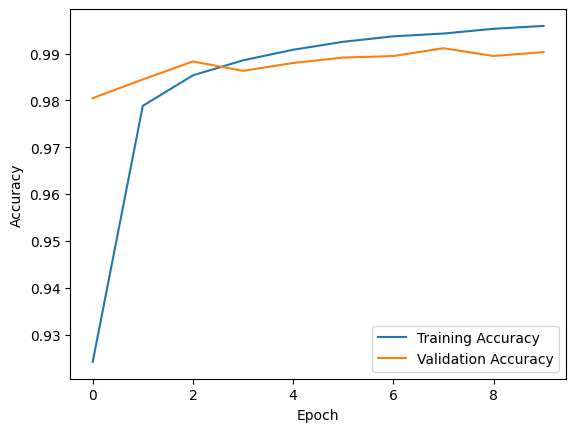

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

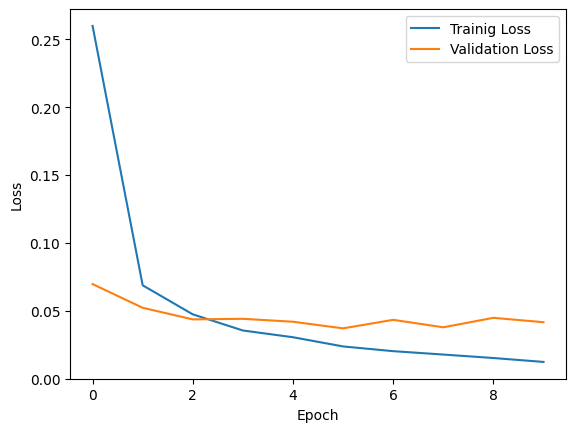

In [ ]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['loss'], label='Trainig Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Q 10. Use transfer learning for large image classification, going through these steps:
a. Create a training set containing at least 100 images per class. For example, you could
classify your own pictures based on the location (beach, mountain, city, etc.), or
alternatively you can use an existing dataset (e.g., from TensorFlow Datasets).
b. Split it into a training set, a validation set, and a test set.
c. Build the input pipeline, including the appropriate preprocessing operations, and
optionally add data augmentation.
d. Fine-tune a pretrained model on this dataset.

ANS: https://github.com/webstormuser/DeepLearning/blob/main/Practicals/Untitled7(1).ipynb